#Model Comparison

##Purpose of this Notebook

This notebook serves as a baseline on why I chose the current model, this will serve as a comparison between the XGBoost and RandomForests model

The goal is to:
- Compare models using metrics such as F1, precision, recall, and Cross Validation
- Choose a model that best generalizes to real world traffic flow
- Justify the model selection

###Imports

In [1]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import InconsistentVersionWarning
warnings.filterwarnings("ignore", category=InconsistentVersionWarning)


###Loading the models and data

In [ ]:
#We are going to use X and y from the train ready data pkl file
X,y = joblib.load('train_ready_data.pkl')

#Load both models
xgb = joblib.load('XGBClassifier.pkl')
rf = joblib.load('RFclassifier.pkl')

###Classification Report

In [6]:
#We are going to split the dataset for accuracy and model purposes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

#Reports
print('🔎 Random Forest Report: ')
print(classification_report(y_test, rf_preds))
print('\n 🔎 XGBoost Report: ')
print(classification_report(y_test, xgb_preds))

🔎 Random Forest Report: 
              precision    recall  f1-score   support

           0       0.81      0.70      0.76       186
           1       0.87      0.93      0.90       409

    accuracy                           0.86       595
   macro avg       0.84      0.82      0.83       595
weighted avg       0.85      0.86      0.85       595


 🔎 XGBoost Report: 
              precision    recall  f1-score   support

           0       0.80      0.59      0.68       186
           1       0.83      0.93      0.88       409

    accuracy                           0.83       595
   macro avg       0.82      0.76      0.78       595
weighted avg       0.82      0.83      0.82       595



###Confusion Matrices

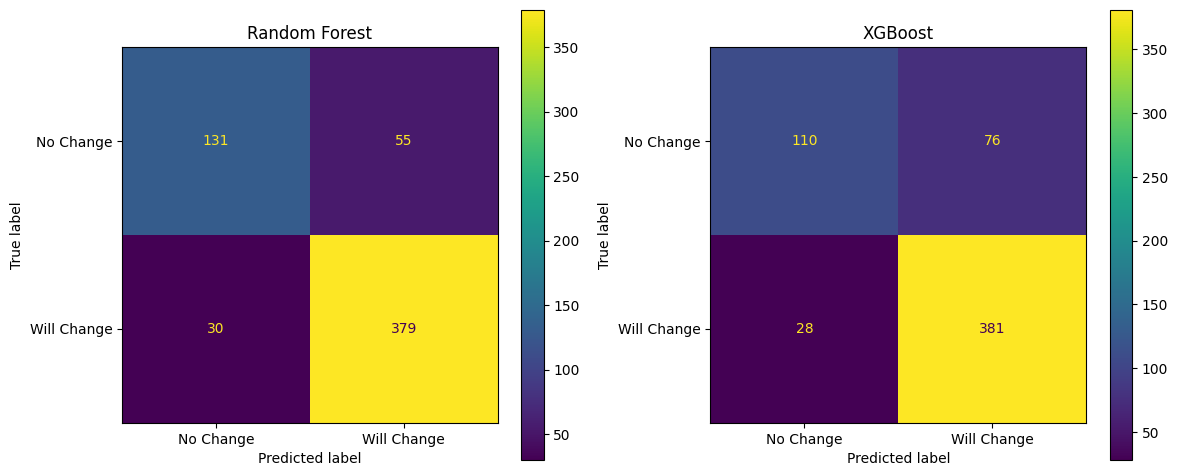

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, ax=axes[0], display_labels=["No Change", "Will Change"])
axes[0].set_title("Random Forest")

ConfusionMatrixDisplay.from_predictions(y_test, xgb_preds, ax=axes[1], display_labels=["No Change", "Will Change"])
axes[1].set_title("XGBoost")

plt.tight_layout()
plt.show()


*If you're confused on how to read a confusion matrix, refer to the figure below:*


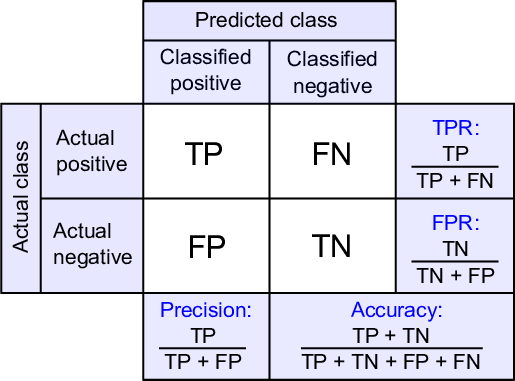

###Cross Validation Scores

In [12]:
rf_cv = cross_val_score(rf, X, y, cv=5)
xgb_cv = cross_val_score(xgb, X, y, cv=5)

print(f'🌲 Random Forest CV Score: {rf_cv.mean()}')
print(f'⚡ XGBoost CV Score: {xgb_cv.mean()}')


🌲 Random Forest CV Score: 0.7389949919361685
⚡ XGBoost CV Score: 0.8361887785417197


###Conclusion

As we seen before, both models performed pretty well:
<table>
  <tr>
    <th>Metric</th>
    <th>Random Forest</th>
    <th>XGBoost</th>
  </tr>
  <tr>
    <td>Test F1-Score (weighted)</td>
    <td>0.85</td>
    <td>0.82</td>
  </tr>
  <tr>
    <td>Minority Class Recall</td>
    <td>0.70</td>
    <td>0.59</td>
  </tr>
  <tr>
    <td>Majority Class Recall</td>
    <td>0.93</td>
    <td>0.93</td>
  </tr>
  <tr>
    <td><b>Cross-Validation F1</b></td>
    <td><b>0.74</b></td>
    <td><b>0.84</b></td>
  </tr>
</table>


While both models performed almost equally well in classifying traffic jams, we need to take into account the reports. Random Forests slightly outperformed XGBoost in the test set accuracy(RF 86% vs XGB 83%) and recall for minority class(70% vs 59% for class 0). However XGBoost demonstrated a much better cross validation performance, achieving a 0.84 compared to the 0.74 for Random Forest

A high Cross Validation score suggests that while Random Forest may perform slightly better on the test split set we gave it, XGBoost will generalize better and is more robust on unseen/new data, which is prefered moving forward

>📌 Final pick: ✅ XGBoost — chosen for its stability, consistency, and higher overall F1 performance across folds.

The model will be saved and used in the simulation + live prediction system, with performance periodically re-evaluated as more data is collected.